# Exploratory Data Analysis & Introduction

## Goal
Investigate top-paying roles and skills in the data science industry.
Use Python to explore a real-life dataset on job postings.
For job-seekers: use these insights to help find the best job opportunities.

## Final Deliverables:
- Create Jupyter Notebooks showcasing core skills in Python.
- Create a summary page (via README.md) capturing your findings.
- Share this project via GitHub & LinkedIn.

## Questions to Answer:
1. **What are the most demanded skills for the top 3 most popular data roles?**
2. **How are in-demand skills trending for Data Analysts?**
3. **How well do jobs and skills pay for Data Analysts?**
4. **What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)**


# Exploratory Data Analysis for all Data Roles

# Roles to Explore

In [2]:
### Importing libraries 
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  


c:\Users\D E L L\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
### Loading the data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [4]:
### Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

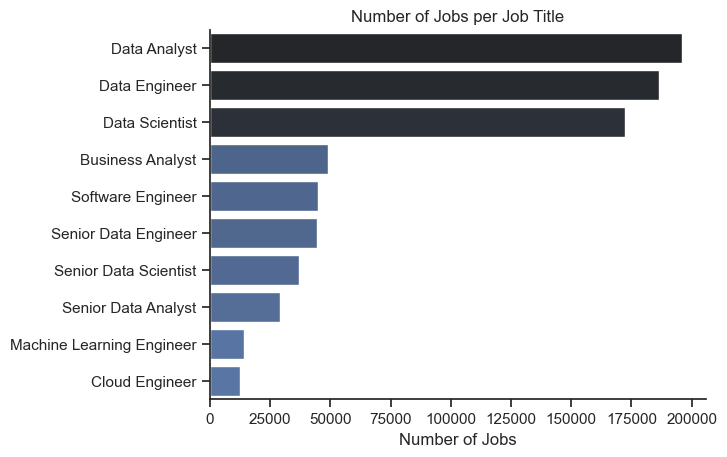

In [5]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

# Countries to explore

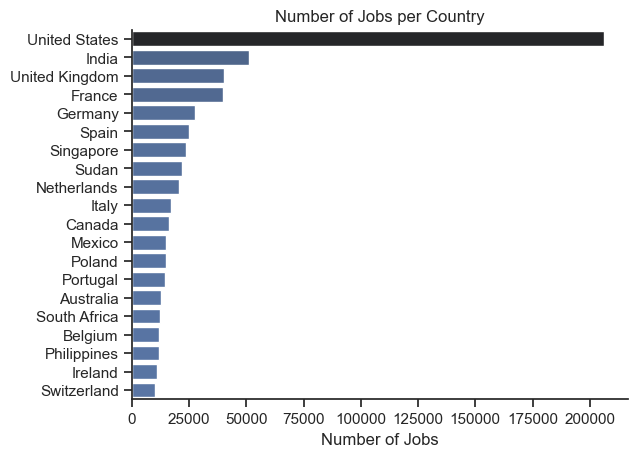

In [6]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

# Companies to explore

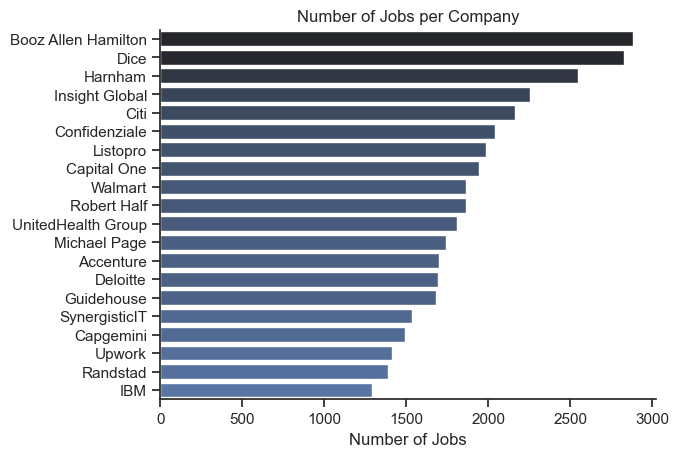

In [7]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

# Job Opportunities

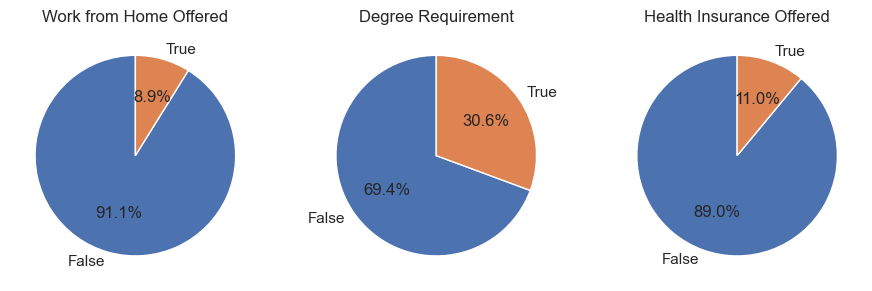

In [8]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

# Exploratory data analysis for data analyst jobs in India

In [9]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst roles in India

In [10]:
df_DA_IND = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')]

# Locations to Explore:

C:\Users\D E L L\AppData\Local\Temp\ipykernel_27180\480770051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index.str.split(',').str[0], palette='dark:b_r')


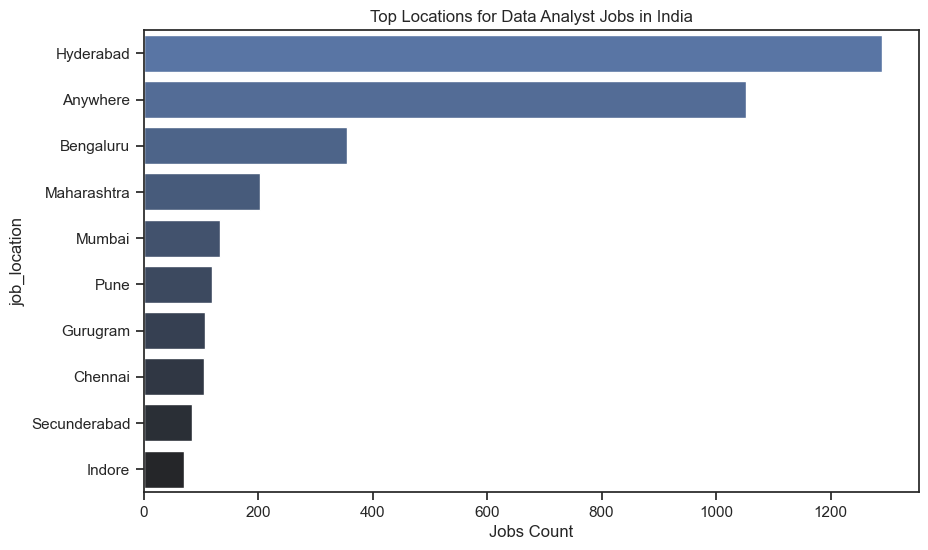

In [22]:
top = df_DA_IND[df_DA_IND.job_location != "India"].job_location.value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top.values, y=top.index.str.split(',').str[0], palette='dark:b_r')
plt.title('Top Locations for Data Analyst Jobs in India')
plt.xlabel('Jobs Count')
plt.show()

# Job Opportunities

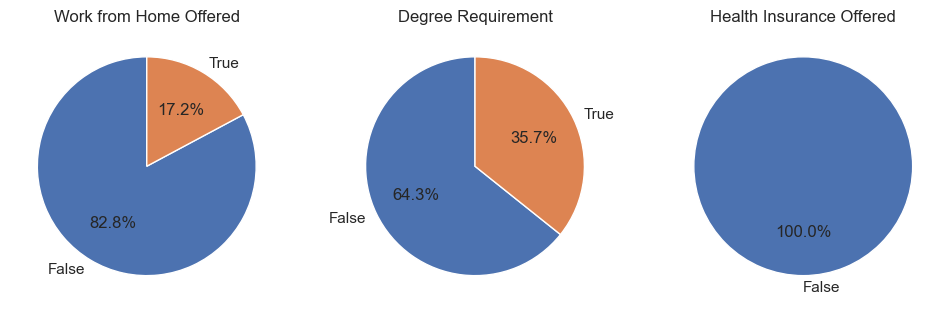

In [12]:
# rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    value_counts = df_DA_IND[column].value_counts()
    
    # Dynamically generate labels based on actual data
    labels = [str(x) for x in value_counts.index]
    
    ax[i].pie(
        value_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90
    )
    ax[i].set_title(title)

# plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

# Companies to Explore:

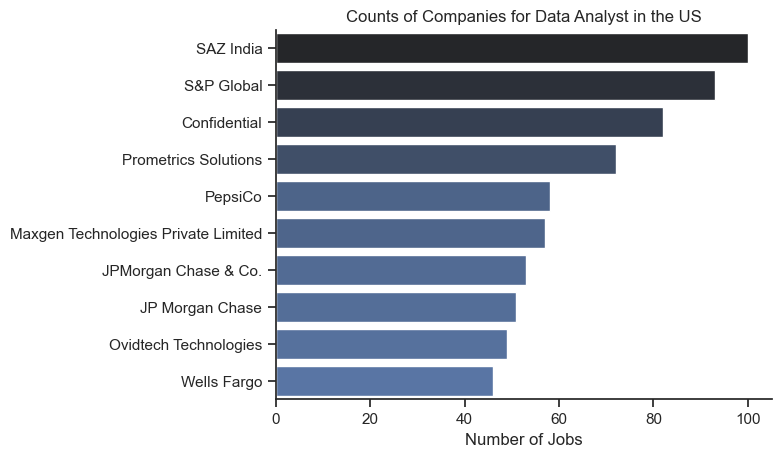

In [13]:
df_plot = df_DA_IND['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()